<small><i>Ulrich Klauck - Studiengang Informatik - Hochschule Aalen</i></small>

# Bibliotheken und Bilddarstellung

Zunächst müssen die entsprechenden Bibliotheken geladen werden:

In [1]:
import cv2

## Einfache Grauwertbilder

Das Laden eines Bildes als Grauwertbild erfolgt durch 

In [8]:
img_name = '../../images/Reutte.tif'

img = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)

if img is None:
    print('Image ', img_name, ' not found')

Die Darstellung außerhalb des Notebooks funktioniert mit den Standardmöglichkeiten von OpenCV, ist aber insgesamt nicht besonders praktisch

In [9]:
cv2.imshow('image', img)
_ = cv2.waitKey(10)

Es ist günstig, alle OpenCV-Fenster wieder zu schließen, da sie ansonsten nicht auf Nutzerinteraktionen reagieren:

In [10]:
cv2.destroyAllWindows()
_ = cv2.waitKey(10)

Alternativ - und für die eigene Dokumentation bessser - kann man die Funktionen der Bibliothek matplotlib zur Darstellung verwenden. Dazu muss (je nach System) die Bibliothek mithilfe einer 'inline' Anweisung zur Erzeugung von inline-Grafiken vorbereitet werden.

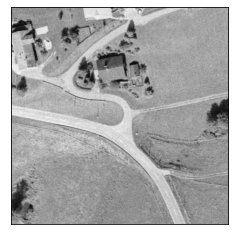

In [11]:
from matplotlib import pyplot as plt

plt.imshow(img, cmap='gray')
_ = plt.xticks([]), plt.yticks([])
plt.show()

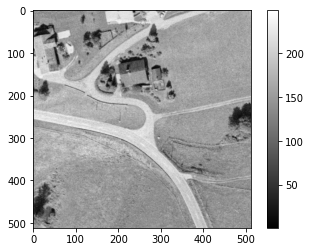

In [12]:
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

Um zu vermeiden, dass man dies bei jeder Bilddarstellung selbst erledigen muss, steht in der Bibliothek utils eine Hilfsfunktion imshow() zur Verfügung, die ein Bild darstellt. 

In [13]:
from uk_utils import imshow

imshow(img)
plt.colorbar()
plt.show()

ModuleNotFoundError: No module named 'uk_utils'

Die Bibliothek imgutils steht auf Canvas zur Verfügung und muss installiert werden:

$\texttt{python setup.py install [--user]}$

Bilder in pyopencv sind numpy-Arrays. In den Variablen shape, ndim usw. stehen wichitge Informationen zum Bildfornat:

In [14]:
print('Shape: ', img.shape)
print('Das Bild hat %d Dimensionen.' % (img.ndim))

print('Das Bild hat %dx%d Pixel, Datentyp der Pixel ist %s.' %
      (img.shape[0], img.shape[1], img.dtype))

Shape:  (512, 512)
Das Bild hat 2 Dimensionen.
Das Bild hat 512x512 Pixel, Datentyp der Pixel ist uint8.


## Farbbilder

In [15]:
img_name = '../../images/maske.tif'
img2a = cv2.imread(img_name)

if img2a is None:
    print('Image ', img_name, ' not found')

Bei Farbbildern muss man beachten, dass bei OpenCV der BGR-Farbraum verwendet wird und die Bilder in den RGB-Farbraum konvertiert werden.

NameError: name 'imshow' is not defined

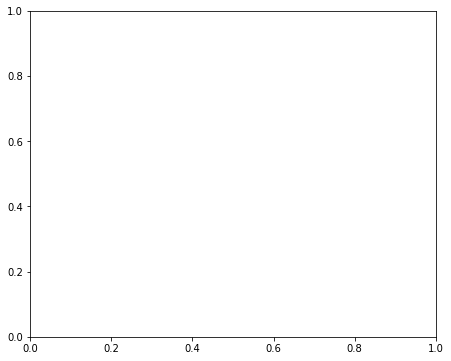

In [16]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
imshow(img2a)

plt.subplot(1, 2, 2)
img2b = cv2.cvtColor(img2a, cv2.COLOR_BGR2RGB)

imshow(img2b)

plt.show()

In [17]:
plt.figure(figsize=(7, 6))

imshow(img2a, reverse_channels=True, debug=True)

NameError: name 'imshow' is not defined

<Figure size 504x432 with 0 Axes>

In [18]:
imshow(img2a, True)

NameError: name 'imshow' is not defined

In [19]:
print('Shape: ', img2a.shape)

print('\nDas Bild hat %d Dimensionen.' % (img2a.ndim))
print('Jeder der %d Kanäle hat %dx%d Pixel.' % (img2a.shape[2], img2a.shape[0], img2a.shape[1]))

print('\nInsgesamt hat das Bild %d Pixel, Datentyp der Pixel ist %s.' % (img2a.size, img2a.dtype))

Shape:  (512, 768, 3)

Das Bild hat 3 Dimensionen.
Jeder der 3 Kanäle hat 512x768 Pixel.

Insgesamt hat das Bild 1179648 Pixel, Datentyp der Pixel ist uint8.


# Lesezugriff auf Pixel

In [ ]:
img_name = '../../images/maske.tif'
img = cv2.imread(img_name)

if img is None:
    print('Image ', img_name, ' not found')

Der Lesezugriff auf einzelne Pixel kann auf unterschiedliche Arten erfolgen:

In [ ]:
img.shape

In [ ]:
px1   = img[100, 100]           # Zugriff auf ein ganzes Pixel
blue1 = img[100, 100, 0]        # Zugriff auf einen Kanal (Blau) 
blue2 = img.item(100, 100, 0)   # Zugriff auf einen Kanal (Blau)

print('Gesamtes Pixel: ', px1)
print('Blaukanal: ', blue1, blue2)

In [ ]:
%timeit blue1 = img[100, 100, 0]
%timeit blue2 = img.item(100, 100, 0)

# Schreibzugriff auf Pixel

Ähnlich erfolgt der Schreibzugriff auf einzelne Pixel:

In [ ]:
img[10, 10] = [255, 255, 255]
img[20, 20, 2] = 255
img.itemset((30, 30, 2), 255)

In [ ]:
%timeit img[20, 20, 2] = 255
%timeit img.itemset((30,30,2), 255)

Der Zugriff lässt sich leicht auf mehrere Pixel erweitern. Die so adressierten Teilbilder werden in der Bildverarbeitung als 'region of interest' (roi) bezeichnet.

In [ ]:
roi = img[250:310, 330:390]
img[323:383, 100:160] = roi

imshow(img, True)

# Arbeiten mit Kanälen in Farbbildern

Farbbilder können in einzelne Kanäle zerlegt werden. Die erste Methode verwendet eine OpenCV-Funktion, die zweite Methode verwendet die Möglichkeiten der numpy-Arrays:

In [ ]:
(b1, g1, r1) = cv2.split(img)

b2 = img[:,:,0]
g2 = img[:,:,1]
r2 = img[:,:,2]

plt.figure(figsize=(20,10))

plt.subplot(1, 3, 1); imshow(r1)
plt.subplot(1, 3, 2); imshow(g1)
plt.subplot(1, 3, 3); imshow(b1)

plt.show()

In [ ]:
img[:, :, 0] = 0
img[:, :, 1] = 0

In [ ]:
imshow(img, True)

# Arbeiten mit ganzen Bildern

Es können auch einfach ganze Bilder kopiert werden oder leere Bilder erzeugt werden:

In [ ]:
import numpy as np

nRows = 128
nCols = 256

img4 = np.ndarray((nRows, nCols), dtype=np.uint8)     # Bild mit 128 x 256 Pixel und zufälligem Inhalt
img5 = np.zeros((nRows, nCols), dtype=np.uint8)       # Schwarzes Bild mit 128 x 256 Pixel

img6 = img.copy()     # Erzeugt eine Kopie von img mit eigenem Speicher
img7 = img            # Erzeugt eine Kopie von img ohne eigenen Speicher

In [ ]:
imshow(img5)

In [ ]:
nRows = 1024
nCols = 1024

img8 = np.ndarray((nRows, nCols), dtype=np.uint8)     

for r in range(nRows):
    for c in range(nCols):
        img8[r,c] = 0